<a href="https://colab.research.google.com/github/danielruizm16/ComputationalMethods/blob/main/Calculus/Calculus_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Calculus

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange,CubicSpline, interp1d
from scipy.integrate import trapezoid,simpson,fixed_quad, quad, tplquad
from scipy.special import roots_legendre

# 1.
The electric potential of a ring of radius $R$, along its vertical axis $z$, is given by:


$$
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
$$

with $R=0.1$ mm. Rescale the problem in units of $kq_{tot}$, then:

- Calculate the electric field using the SymPy library
- Calculate the electric field at a point $z = 0.1$ mm using the np.gradient method and the 3-point derivative method.
- Compare the results from all three methods (SymPy analytical, np.gradient, and 3-point derivative)
- Calculate the  electric field for different values of $z$ with $z>0$, using np.gradient. Construct a plot of $E$ vs $z$.

---
Remember that the $z$ component of the electric field is given by:

$$
E_z = - \frac{\partial V}{\partial z}
$$

In [57]:
# Given parameter
R = 1e-4  # m
z_target= 1e-4 # m

# Define symbols
z_sym = sp.Symbol('z')
R_sym = sp.Symbol('R')
k_sym = sp.symbols('k')
q_sym = sp.symbols('q_{tot}')

# Electric potential
V = k_sym*q_sym / sp.sqrt(z_sym**2 + R_sym**2)

V

k*q_{tot}/sqrt(R**2 + z**2)

In [58]:
# Rescale Potential
V=V/(k_sym*q_sym)

# Electric field (Ez = -dV/dz)
Ez_analytical = -sp.diff(V, z_sym)
print(f'The electric field in units of kqtot is given by:')
Ez_analytical

The electric field in units of kqtot is given by:


z/(R**2 + z**2)**(3/2)

In [59]:
# Substitute R = 0.1 mm
V = V.subs(R_sym,R)
Ez_analytical = Ez_analytical.subs(R_sym, R)

In [60]:
# Analytical solution at z = 0.1 mm
E_analytical_z01 = float(Ez_analytical.subs(z_sym, z_target))
print(f'Field value at z = 0.1 mm analytically: Ez = {E_analytical_z01:.3}')

Field value at z = 0.1 mm analytically: Ez = 3.54e+07


In [61]:
# Define V as a function to operate with it

#V = lambda z: 1/np.sqrt(z**2 + R**2)
V= sp.lambdify(z_sym,V)

# Values to use gradient
z_values = np.linspace(z_target, z_target*10, 100000)

# Calculate E
E_values = -np.gradient(V(z_values), z_values)
E_gradient_z01=E_values[0]

print(f'Field value at z = 0.1 mm with np.gradient is: Ez = {E_gradient_z01:.3}')

Field value at z = 0.1 mm with np.gradient is: Ez = 3.54e+07


In [62]:
# 3-point derivative method
def three_point_central(func, x, h=1e-5):
    """3-point central difference - O(h^2)"""
    return (func(x + h) - func(x - h)) / (2 * h)

def three_point_forward(func, x, h=1e-5):
    """3-point forward difference - O(h^2)"""
    return (-3 * func(x) + 4 * func(x + h) - func(x + 2 * h)) / (2 * h)

def three_point_backward(func, x, h=1e-5):
    """3-point backward difference - O(h^2)"""
    return (3 * func(x) - 4 * func(x - h) + func(x - 2 * h)) / (2 * h)

In [63]:
# Calculate using all three-point methods
E_3point_central_z01 = -three_point_central(V, z_target)
E_3point_forward_z01 = -three_point_forward(V, z_target)
E_3point_backward_z01 = -three_point_backward(V, z_target)

print(f'Field value at z = 0.1 mm with 3-point central:   Ez = {E_3point_central_z01:.3}')
print(f'Field value at z = 0.1 mm with 3-point forward:   Ez = {E_3point_forward_z01:.3}')
print(f'Field value at z = 0.1 mm with 3-point backward:  Ez = {E_3point_backward_z01:.3}')

Field value at z = 0.1 mm with 3-point central:   Ez = 3.53e+07
Field value at z = 0.1 mm with 3-point forward:   Ez = 3.54e+07
Field value at z = 0.1 mm with 3-point backward:  Ez = 3.55e+07


In [64]:
# Create comparison DataFrame
comparison_data = {
    'Method': [
        'Analytical (Exact)',
        'np.gradient', 
        '3-Point Central',
        '3-Point Forward',
        '3-Point Backward'
    ],
    'E_z at z=0.1mm': [
        E_analytical_z01,
        E_gradient_z01,
        E_3point_central_z01,
        E_3point_forward_z01,
        E_3point_backward_z01
    ],
    'Absolute Error': [
        0.0,
        abs(E_gradient_z01 - E_analytical_z01),
        abs(E_3point_central_z01 - E_analytical_z01),
        abs(E_3point_forward_z01 - E_analytical_z01),
        abs(E_3point_backward_z01 - E_analytical_z01)
    ],
    'Relative Error (%)': [
        0.0,
        abs((E_gradient_z01 - E_analytical_z01) / E_analytical_z01) * 100,
        abs((E_3point_central_z01 - E_analytical_z01) / E_analytical_z01) * 100,
        abs((E_3point_forward_z01 - E_analytical_z01) / E_analytical_z01) * 100,
        abs((E_3point_backward_z01 - E_analytical_z01) / E_analytical_z01) * 100
    ]
}

df_comparison = pd.DataFrame(comparison_data)

df_comparison

,Method,E_z at z=0.1mm,Absolute Error,Relative Error (%)
0,Analytical (Exact),3.535534e+07,0.000000,0.000000
1,np.gradient,3.535454e+07,795.538873,0.002250
2,3-Point Central,3.531068e+07,44662.933900,0.126326
3,3-Point Forward,3.540678e+07,51444.560109,0.145507
4,3-Point Backward,3.549372e+07,138376.933669,0.391389


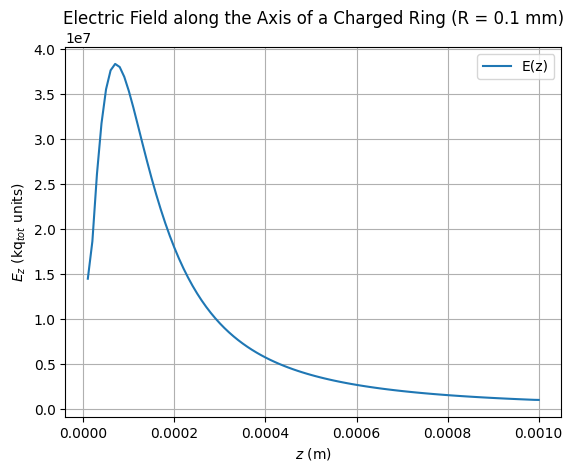

In [65]:
# Define a new range for z
z = np.linspace(1e-5, 1e-3,100)

# E for this range
E = -np.gradient(V(z), z)

# Plot
plt.title('Electric Field along the Axis of a Charged Ring (R = 0.1 mm)')
plt.plot(z, E, label = 'E(z)')
plt.xlabel('$z$ (m)')
plt.ylabel('$E_z$ (kq$_{tot}$ units)')
plt.legend()
plt.grid()
plt.show()

# 2.

In a circuit with a voltage of $\varepsilon(t)$ and an inductance of $L$, Kirchhoff's first law gives us the following relationship:

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

where $R$ is the circuit resistance, and $I$ is the current. Suppose we measure the current for various values of $t$ and obtain:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # time
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # current
```

where $t$ is measured in seconds, $I$ is given in Amperes, the inductance $L= 0.98$ H, and the resistance is $0.142 \Omega$. Approximate the voltage $\varepsilon(t)$ at the values t=1.00, 1.01, 1.02, 1.03, 1.04. To do this, perform the following steps:


- Create a pandas DataFrame with the time and current values.
- Use the finite difference method and the three-point formula to calculate the numerical derivative.
- Now, find an interpolation polynomial using one of the methods discussed and calculate the 'exact' derivative. Compare your results.

In [66]:
# Given data
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # time
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # current
L = 0.98  # H
R = 0.142  # Ω

In [67]:
df = pd.DataFrame({'t': t, 'i': i})
df

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [68]:
di_dt = np.gradient(df['i'], df['t'],edge_order=2)
df['di_dt'] = di_dt
df

,t,i,di_dt
0,1.00,3.10,2.0
1,1.01,3.12,2.0
2,1.02,3.14,3.0
3,1.03,3.18,5.0
4,1.04,3.24,7.0


In [69]:
def fin_diff(y,x):
    """
    Calculate derivative using finite differences
    For interior points: f'(x) ≈ (f(x+h) - f(x-h)) / (2h)
    For endpoints: use forward/backward difference
    """
    h = x[1]-x[0] # Assuming uniform spacing
    n = len(x)  # Number of points
    dy_dx = np.zeros(n) # Array for the derivatives

    for i in range(n):
        if i==0:
            # Forward derivative for the first point
            dy_dx[i]=(y[i+1]-y[i])/h6
        elif i==n-1:
            # Backward derivative for the last point
            dy_dx[i]=(y[i]-y[i-1])/h
        else:
            # Central difference for the other points
            dy_dx[i]=(y[i+1]-y[i-1])/(2*h)
    return dy_dx

In [70]:
def three_point_derivative(y, x):
    """
    Calculate derivative using three-point formula
    """
    h = x[1]-x[0] # Assuming uniform spacing
    n = len(x)  # Number of points
    derivative = np.zeros(n) # Array for the derivatives

    for i in range(n):
        if i == 0:
            # Forward derivative for the first point
            derivative[i] = (-3 * y[i] + 4 * y[i+1] - y[i+2]) / (2 * h)
        elif i == n - 1:
            # Backward derivative for the last point
            derivative[i] = (3 * y[i] - 4 * y[i-1] + y[i-2]) / (2 * h)
        else:
            # Central difference for the other points
            derivative[i] = (y[i+1] - y[i-1])/ (2 * h)

    return derivative

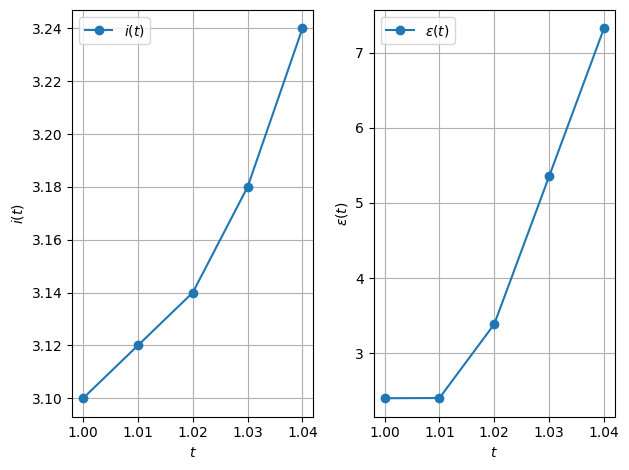

In [71]:
def epsilon(L, R, di_dt, i):
  return L*di_dt + R*i

df['epsilon'] = epsilon(L, R, df['di_dt'], df['i'])

fig, ax = plt.subplots(1,2)
ax[0].plot(df['t'], df['i'], 'o-', label='$i(t)$')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$i(t)$')
ax[0].legend()
ax[0].grid()
ax[1].plot(df['t'], df['epsilon'], 'o-', label=r'$\epsilon(t)$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel(r'$\epsilon(t)$')
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()

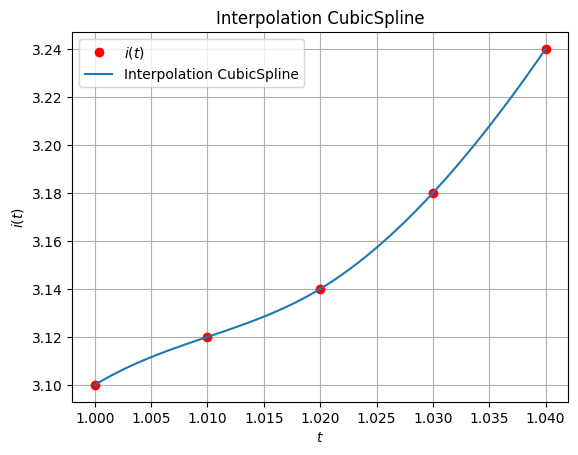

In [72]:
Pn = CubicSpline(df['t'], df['i'])
Pn_prime = Pn.derivative()
t_interp = np.linspace(df['t'].min(), df['t'].max(), 100)
i_interp = Pn(t_interp)

plt.title('Interpolation CubicSpline')
plt.plot(df['t'], df['i'], 'ro', label='$i(t)$')
plt.plot(t_interp, i_interp, label='Interpolation CubicSpline')
plt.xlabel('$t$')
plt.ylabel('$i(t)$')
plt.legend()
plt.grid()
plt.show()

In [73]:
# Calculate exact derivative at our data points
di_dt_exact = Pn_prime(t)

# Calculate voltage using exact derivative
epsilon_exact = L * di_dt_exact + R * i

df['di_dt_exact'] = di_dt_exact
df['epsilon_exact'] = epsilon_exact

# Calculate differences
df['Absolute_Error_di_dt'] = np.abs(df['di_dt'] - df['di_dt_exact'])
df['Absolute_Error_diff_epsilon'] = np.abs(df['epsilon'] - df['epsilon_exact'])

df

,t,i,di_dt,epsilon,di_dt_exact,epsilon_exact,Absolute_Error_di_dt,Absolute_Error_diff_epsilon
0,1.00,3.10,2.0,2.40020,2.833333,3.216867,0.833333,0.816667
1,1.01,3.12,2.0,2.40304,1.583333,1.994707,0.416667,0.408333
2,1.02,3.14,3.0,3.38588,2.833333,3.222547,0.166667,0.163333
3,1.03,3.18,5.0,5.35156,5.083333,5.433227,0.083333,0.081667
4,1.04,3.24,7.0,7.32008,6.833333,7.156747,0.166667,0.163333


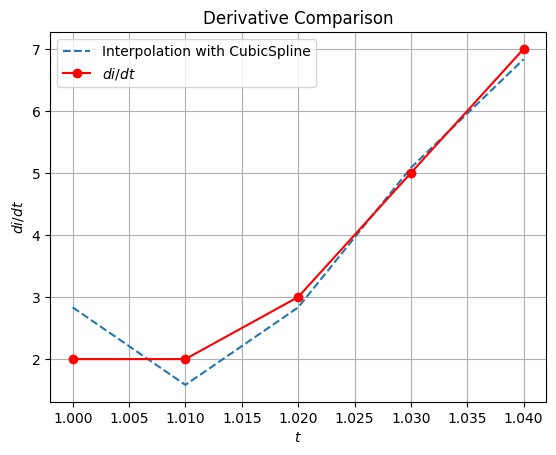

In [74]:
plt.plot(df['t'], Pn_prime(df['t']), '--', label='Interpolation with CubicSpline')
plt.plot(df['t'], df['di_dt'], 'ro-', label='$di/dt$')
plt.title('Derivative Comparison')
plt.xlabel('$t$')
plt.ylabel('$di/dt$')
plt.legend()
plt.grid()
plt.show()

# 3.
Using the following time and distance data:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Time in s
x = np.array([0, 225, 383, 623, 742, 993])  # Distance traveled in m
```

- Determine the instantaneous velocity for each of the times and distances shown.

- What will the velocity be at $t=12$?


In [75]:
# Provided data
t = np.array([0, 3, 5, 8, 10, 13])  # Time in s
x = np.array([0, 225, 383, 623, 742, 993])  # Distance in m

In [76]:
# Calculate instantaneous velocity (derivative of x with respect to t)
v = np.gradient(x, t)

In [77]:
# Display velocities at each instant
print("Instantaneous velocities:")
for time, velocity in zip(t, v):
    print(f"t = {time} s → v = {velocity:.2f} m/s")

Instantaneous velocities:
t = 0 s → v = 75.00 m/s
t = 3 s → v = 77.40 m/s
t = 5 s → v = 79.40 m/s
t = 8 s → v = 67.70 m/s
t = 10 s → v = 69.17 m/s
t = 13 s → v = 83.67 m/s


In [78]:
# Linear interpolation
interp_linear = interp1d(t, v, kind='linear', fill_value='extrapolate')
v_12_linear = interp_linear(12)

# Lagrange interpolation
poly_lagrange = lagrange(t, v)
v_12_lagrange = poly_lagrange(12)

# Cubic splines
cubic_spline = CubicSpline(t, v, extrapolate=True)
v_12_spline = cubic_spline(12)

# Results
print("Velocity at t = 12 s:")
print(f"- Linear: {v_12_linear:.2f} m/s")
print(f"- Lagrange: {v_12_lagrange:.2f} m/s")
print(f"- Cubic spline: {v_12_spline:.2f} m/s")

Velocity at t = 12 s:
- Linear: 78.83 m/s
- Lagrange: 81.56 m/s
- Cubic spline: 78.30 m/s


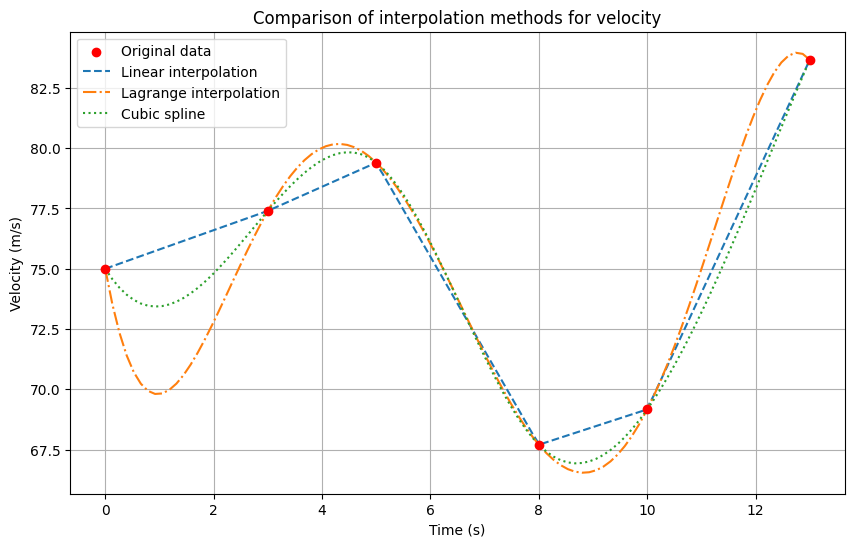

In [79]:
# Comparative graph
t_values = np.linspace(0, 13, 100)  # Points for plotting the interpolations
v_linear = interp_linear(t_values)
v_lagrange = poly_lagrange(t_values)
v_cubic_splines = cubic_spline(t_values)

plt.figure(figsize=(10, 6))
plt.scatter(t, v, color='red', label='Original data', zorder=5)
plt.plot(t_values, v_linear, label='Linear interpolation', linestyle='--')
plt.plot(t_values, v_lagrange, label='Lagrange interpolation', linestyle='-.')
plt.plot(t_values, v_cubic_splines, label='Cubic spline', linestyle=':')
#plt.axvline(x=12, color='gray', linestyle=':', label='t = 12 s')
plt.title("Comparison of interpolation methods for velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()

# 4.
Debye's theory for solids provides the heat capacity of a solid at temperature $T$ as:

$$C_V = 9V \rho k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D / T} \frac{x^4 e^x}{(e^x - 1)^2} \, dx$$

where $V$ = volume of the solid, $\rho$ = number density of atoms, $k_B$ = Boltzmann's constant, and $\theta_D$ = Debye temperature (material property).


- Write a Python function `cv(T)` that calculates $C_V$ for a given temperature value, for an aluminum sample with:
    - Volume $V = 1000$ $cm^3$
    - Density $\rho = 6.022 \times 10^{28}$ $m^{-3}$
    - Debye temperature $\theta_D = 428$ K
    
Use the trapezoidal and Simpson's methods to evaluate the integral.

- Use your function to plot the heat capacity as a function of temperature from $T = 5$ K to $T = 500$ K.

In [80]:
# Constants and material parameters (aluminum)
V = 1000 * 1e-6  # Volume in m³ (converted from cm³)
rho = 6.022e28    # Atomic density in m⁻³
theta_D = 428     # Debye temperature in K
kB = 1.380649e-23 # Boltzmann constant in J/K

In [81]:
# Debye theory integrand function
def integrand(x):
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

In [82]:
def trapezoidal_composite(f, a, b, n):
    """
    Calculates the definite integral using composite trapezoidal rule.

    Parameters:
    f : function to integrate
    a : lower limit
    b : upper limit
    n : number of subintervals

    Returns:
    float: integral value
    """
    if n <= 0:
        raise ValueError("Number of subintervals must be positive")
    
    h = (b - a) / n
    
    # Calculate the sum of function values at interior points
    suma = 0
    for j in range(1, n):
        suma += f(a + j * h)
    
    # Composite trapezoidal formula
    integral = (h / 2) * (f(a) + f(b)) + h * suma
    
    return integral

In [83]:
# Function to calculate C_V using the trapezoidal method
def cv_trapezoidal(T):
    lim_inf = 1e-6
    lim_sup = theta_D / T
    integral = trapezoidal_composite(integrand, lim_inf, lim_sup, 30)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [84]:
def simpson_13_composite(f, a, b, n):
    """
    Calculates the definite integral using composite Simpson's 1/3 rule.

    Parameters:
    f : function to integrate
    a : lower limit
    b : upper limit
    n : number of subintervals (must be even)

    Returns:
    float: integral value
    """
    if n <= 0:
        raise ValueError("Number of subintervals must be positive")
    if n % 2 != 0:
        raise ValueError("Number of subintervals must be even for Simpson's 1/3 rule")
    
    h = (b - a) / n
    
    # Calculate the sums
    suma_4 = 0  # points with coefficient 4 (odd indices)
    suma_2 = 0  # points with coefficient 2 (even indices)
    
    # Iterate through interior points
    for j in range(1, n):
        x = a + j * h
        if j % 2 == 1:  # odd indices: coefficient 4
            suma_4 += f(x)
        else:  # even indices: coefficient 2
            suma_2 += f(x)
    
    # Composite Simpson's 1/3 formula
    integral = (h / 3) * (f(a) + 4 * suma_4 + 2 * suma_2 + f(b))
    
    return integral

In [85]:
# Function to calculate C_V using Simpson's method
def cv_simpson(T):
    lim_inf = 1e-6
    lim_sup = theta_D / T
    integral = simpson_13_composite(integrand, lim_inf, lim_sup, 30)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [86]:
# Temperature range for plotting
T_values = np.linspace(5, 500, 100)  # From 5K to 500K

In [87]:
# Calculate C_V for each temperature
Cv_trap = [cv_trapezoidal(T) for T in T_values]
Cv_simp = [cv_simpson(T) for T in T_values]

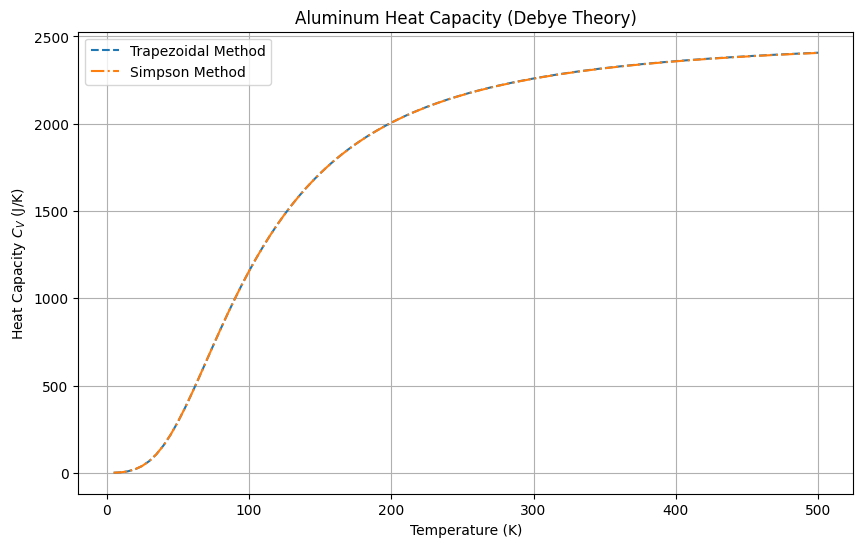

In [88]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(T_values, Cv_trap, label='Trapezoidal Method', linestyle='--')
plt.plot(T_values, Cv_simp, label='Simpson Method', linestyle='-.')
plt.xlabel('Temperature (K)')
plt.ylabel('Heat Capacity $C_V$ (J/K)')
plt.title('Aluminum Heat Capacity (Debye Theory)')
plt.grid()
plt.legend()
plt.show()

## Implementation with scipy

In [89]:
# Function to calculat Cv with trapezoidal method
def cv_trapezoidal_scipy(T):
    x_max = theta_D / T
    x = np.linspace(1e-6, x_max, 1000)  # Integration points
    y = integrand(x)
    integral = trapezoid(y, x)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

In [ ]:
# Function to calculat Cv with Simpson's method
def cv_simpson_scipy(T):
    x_max = theta_D / T
    x = np.linspace(1e-6, x_max, 1000)  
    y = integrand(x)
    integral = simpson(y, x)
    return 9 * V * rho * kB * (T / theta_D)**3 * integral

## For Homework 5: You must implement trapezoid and simpson but defining a tolerance.

# 5.
A current loop of radius $a$ carries a current $I$ at point P which is at a distance $r$ from the center of the loop with spherical coordinates $(r,\theta, \varphi)$. Solve for the $\varphi$ component of the vector potential at point $P$ in terms of elliptic integrals:

$$
A_{\varphi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
$$

where

$$
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
$$

$$
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
$$

$$
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
$$

Here, $K(k)$ is a complete elliptic integral of the first kind and $E(k)$ is a complete elliptic integral of the second kind. For $a$ = 1, $I$ = 3, and $\mu_0∕4π$ = 1, calculate and plot:

- $A_{\varphi}(r = 1.1, \theta)$ vs $\theta$

- $A_{\varphi}(r, \theta = \pi∕3)$ vs $r$

In [91]:
# Define k
def k(r, theta, a):
    k = np.sqrt((4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta)))
    return k

In [92]:
# Define the function to integrate inside E
fe = lambda phi, r, theta, a: np.sqrt(1 - (k(r, theta, a))**2 * (np.sin(phi))**2)

# Define E
def E(fe, r, theta, a):
    I = simpson_13_composite(lambda phi: fe(phi, r, theta, a), 0, np.pi/2, 30)
    return I

In [93]:
# Define the function to integrate inside K
fk = lambda phi, r, theta, a: 1 / np.sqrt(1 - (k(r, theta, a))**2 * (np.sin(phi))**2)

# Define K
def K(fk, r, theta, a):
    I = trapezoidal_composite(lambda phi: fk(phi, r, theta, a), 0, np.pi/2, 30)
    return I

In [94]:
# Define the potential A
def A(r, theta, a, I, mu, fe, fk):
    k1 = k(r, theta, a)
    K1 = K(fk, r, theta, a)
    E1 = E(fe, r, theta, a)
    
    A = mu/(4*np.pi) * (4*I*a / (np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta)))) * (((2 - k1**2)*K1 - 2*E1) / (k1**2))
    
    return A

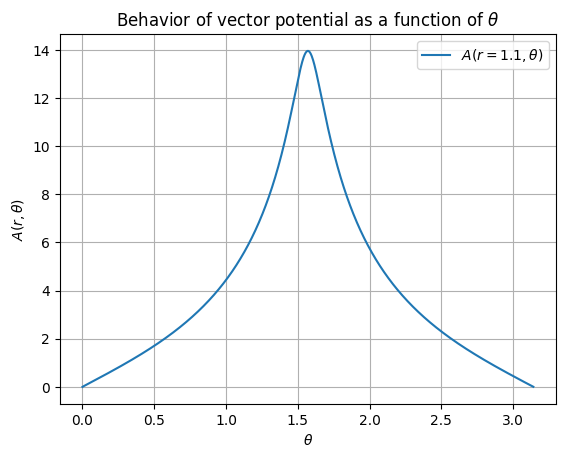

In [95]:
# Defined variables
a = 1
I = 3
mu = 4 * np.pi
r = 1.1

theta = np.linspace(1e-12, np.pi-1e-12, 1000) # Vary theta
A_a = np.zeros(1000) # Array to calculate A while varying theta

# Calculate A for all theta values
for i in range(len(theta)):
    A_a[i] = A(r, theta[i], a, I, mu, fe, fk)

# Plot the behavior of A
plt.title(r'Behavior of vector potential as a function of $\theta$')
plt.plot(theta, A_a, label=r'$A(r=1.1,\theta)$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$A(r,\theta)$')
plt.legend()
plt.grid()
plt.show()

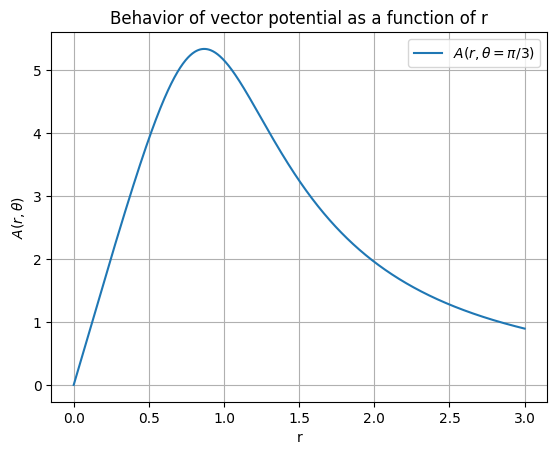

In [96]:
theta = np.pi/3

r = np.linspace(1e-11, 3, 1000) # Vary r
A_b = np.zeros(1000) # Array to calculate A while varying r

# Calculate A for all r values
for i in range(len(r)):
    A_b[i] = A(r[i], theta, a, I, mu, fe, fk)

# Plot the behavior of A
plt.title('Behavior of vector potential as a function of r')
plt.plot(r, A_b, label=r'$A(r,\theta=\pi/3)$')
plt.xlabel('r')
plt.ylabel(r'$A(r,\theta)$')
plt.legend()
plt.grid()
plt.show()

# 6.
Suppose a plane wave with wavelength $\lambda$ is blocked by an object with a straight edge, represented by the solid line at the bottom of this figure:

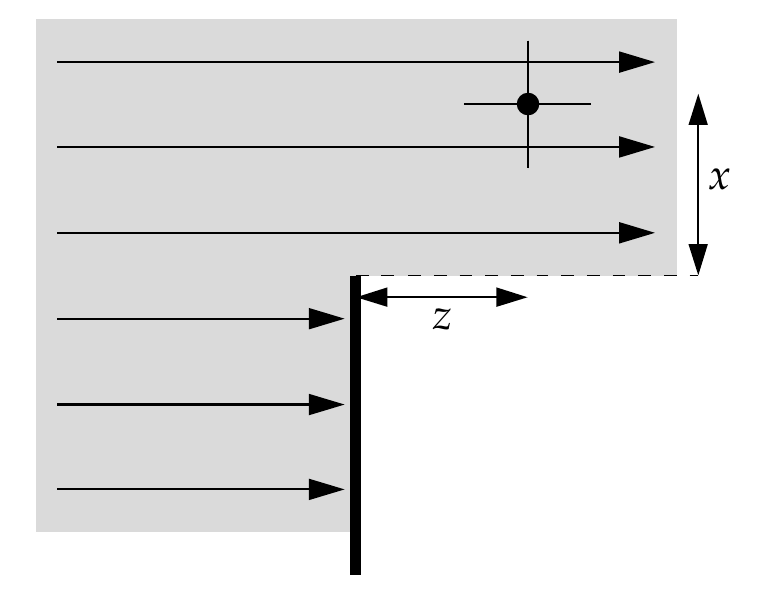

The wave diffracts at the edge, and the resulting intensity at position $(x, z)$ (marked by the dot) is given by near-field diffraction theory as:

$$ I = \frac{I_0}{8} \left( [2C(u) + 1]^2 + [2S(u) + 1]^2 \right)$$

where:
- $$I_0 = \text{intensity of the wave before diffraction} $$
- $$u = x \sqrt{\frac{2}{\lambda z}}$$
- $$C(u) = \int_{0}^{u} \cos \left(\frac{1}{2} \pi t^2 \right)dt
    $$ 
- $$S(u) = \int_{0}^{u} \sin \left(\frac{1}{2} \pi t^2 \right)dt$$

Plot $I/I_0$ as a function of $x$ in the range $-5,\text{m}$ to $5,\text{m}$ for the case of a sound wave with wavelength $\lambda = 1,\text{m}$ and measurement distance $z = 3,\text{m}$ after the straight edge.

**Note:** Use Gaussian quadrature with 50 points

In [97]:
# Given parameters
lambda_ = 1.0  # wavelength in meters
z = 3.0        # measurement distance in meters
x_range = np.linspace(-5, 5, 500)  # x range in meters

In [98]:
def gauss_quad_standard(func, a, b, n):
    """
    Calculates the integral of a function over the interval [a, b]
    using Gaussian quadrature.

    Parameters:
    - func: The function to integrate.
    - n: Number of points for quadrature (degree of Legendre polynomial).

    Returns:
    - Approximation of the integral.
    """
    # Get roots and weights of Legendre polynomial
    t, w = roots_legendre(n)
    x = (b - a) / 2 * t + (a + b) / 2
    # Evaluate weighted sum
    integral = np.sum(w * func(x)) * (b - a) / 2
    return integral

In [99]:
# Define Fresnel integrals C(u) and S(u)
def fresnel_c(u):
    integrand = lambda t: np.cos(0.5 * np.pi * t**2)
    return gauss_quad_standard(integrand, 0, u, 50)

def fresnel_s(u):
    integrand = lambda t: np.sin(0.5 * np.pi * t**2)
    return gauss_quad_standard(integrand, 0, u, 50)

In [100]:
# Calculate I/I0 for each x in x_range
I_over_I0 = []
for x in x_range:
    u = x * np.sqrt(2 / (lambda_ * z))
    C_u = fresnel_c(u)
    S_u = fresnel_s(u)
    intensity = ((2 * C_u + 1)**2 + (2 * S_u + 1)**2) / 8
    I_over_I0.append(intensity)

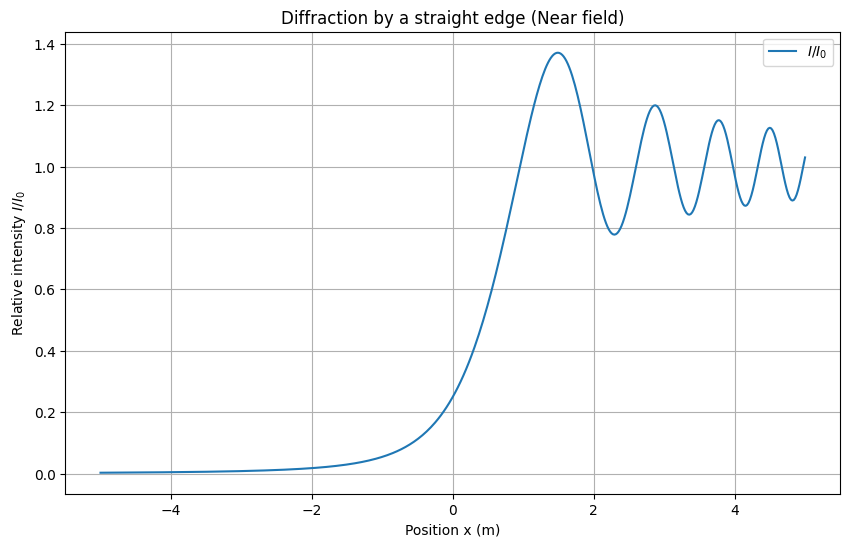

In [101]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, I_over_I0, label=r'$I/I_0$')
plt.xlabel('Position x (m)')
plt.ylabel(r'Relative intensity $I/I_0$')
plt.title('Diffraction by a straight edge (Near field)')
plt.grid()
plt.legend()
plt.show()

## Implementation with scipy

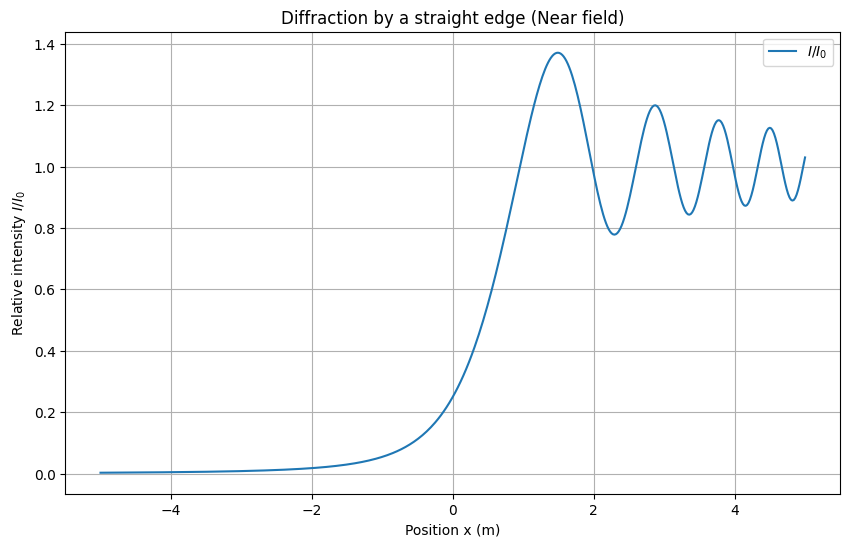

In [102]:
# Define Fresnel integrals C(u) and S(u) using fixed_quad
def fresnel_c(u):
    integrand = lambda t: np.cos(0.5 * np.pi * t**2)
    return fixed_quad(integrand, 0, u, n=50)[0]

def fresnel_s(u):
    integrand = lambda t: np.sin(0.5 * np.pi * t**2)
    return fixed_quad(integrand, 0, u, n=50)[0]

# Calculate I/I0 for each x in x_range
I_over_I0 = []
for x in x_range:
    u = x * np.sqrt(2 / (lambda_ * z))
    C_u = fresnel_c(u)
    S_u = fresnel_s(u)
    intensity = ((2 * C_u + 1)**2 + (2 * S_u + 1)**2) / 8
    I_over_I0.append(intensity)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, I_over_I0, label=r'$I/I_0$')
plt.xlabel('Position x (m)')
plt.ylabel(r'Relative intensity $I/I_0$')
plt.title('Diffraction by a straight edge (Near field)')
plt.grid()
plt.legend()
plt.show()

# 7.
Planck's theory states that in the angular frequency interval $\omega$ to $\omega + d\omega$, a black body radiates electromagnetic thermal energy per second equal to $I(\omega) d\omega$, where:

$$I(\omega) = \frac{\hbar}{4\pi^2 c^2} \frac{\omega^3}{\left(e^{\hbar\omega/k_B T}-1\right)}$$

with $\hbar$ = reduced Planck's constant ($h/2\pi$), $c$ = speed of light, $k_B$ = Boltzmann's constant, and $T$ = absolute temperature.

The total energy per unit area radiated by a black body is:

$$W = \frac{k_B^4 T^4}{4\pi^2 c^2 \hbar^3} \int_0^\infty \frac{x^3}{e^x - 1} \, dx$$

- Numerically evaluate the integral in this expression

- Using the value obtained for the integral and the Stefan-Boltzmann law:

$$W = \sigma T^4$$

calculate the value of the Stefan-Boltzmann constant $\sigma$ (in SI units) with three significant figures. Compare with the known value.

In [103]:
# Integrand function: x^3 / (e^x - 1)
def integrand(x):
    return x**3 / (np.exp(x) - 1)

In [104]:
# Calculate the integral from 0 to infinity
integral, error = quad(integrand, 0, np.inf)
print(f"Integral value: {integral:.6f}")
print(f"Estimated error: {error:.2e}")

Integral value: 6.493939
Estimated error: 2.63e-09


/tmp/ipykernel_5443/1676339450.py:3: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


## Lets see the graph of the integrand

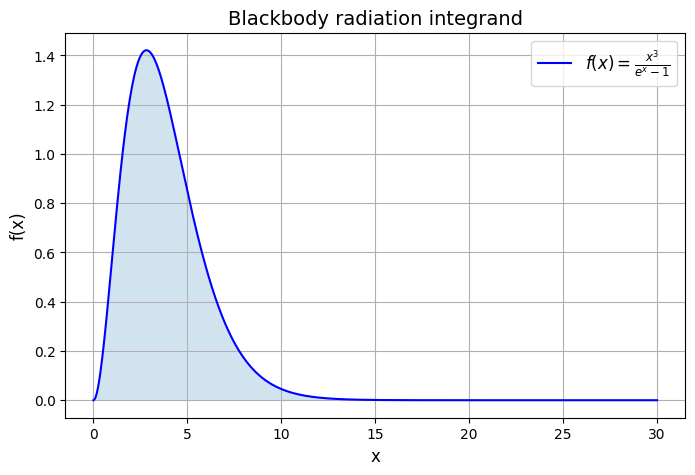

In [105]:
x_values = np.linspace(1e-5, 30, 500)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, integrand(x_values), label=r'$f(x) = \frac{x^3}{e^x - 1}$', color='blue')
plt.fill_between(x_values, integrand(x_values), alpha=0.2)
plt.title('Blackbody radiation integrand', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


In [106]:
# Calculate the integral from 0 to 30
integral, error = quad(integrand, 0, 30)
print(f"Integral value: {integral:.6f}")
print(f"Estimated error: {error:.2e}")

Integral value: 6.493939
Estimated error: 1.37e-11


In [107]:
from scipy.constants import hbar,c,k,sigma

In [108]:
# Calculate sigma using W = sigma * T^4
sigma = (k**4) / (4 * np.pi**2 * c**2 * hbar**3) * integral
print(f"Calculated Stefan-Boltzmann constant: {sigma:.3e} W m⁻² K⁻⁴")

# Known value of sigma
sigma_known = sigma
print(f"Known value of sigma: {sigma_known:.3e} W m⁻² K⁻⁴")

# Percentage comparison
error_percent = abs(sigma - sigma_known) / sigma_known * 100
print(f"Percentage error: {error_percent}%")

Calculated Stefan-Boltzmann constant: 5.670e-08 W m⁻² K⁻⁴
Known value of sigma: 5.670e-08 W m⁻² K⁻⁴
Percentage error: 0.0%


# 8.
The wave function of the electron in the $3d_0$ state ($n=3$, $l=2$, $m=0$) in dimensionless radial units is:

$$\Psi_{320}(r,\theta,\varphi) = \frac{1}{81\sqrt{6\pi}} r^2 e^{-r/3} (3\cos^2\theta - 1)$$


The total probability of locating the electron must satisfy:

$$ \int_0^{2\pi} \int_0^\pi \int_0^\infty  |\Psi_{320}(r,\theta,\varphi)|^2 \, r^2 \, \sin\theta dr  d\theta d\varphi = 1$$

Numerically verify this normalization.

In [109]:
# Function for the radial part: r^6 * exp(-2r/3)
def integrand_radial(r):
    return r**6 * np.exp(-2 * r / 3)

# Function for the angular part: (3cos²θ - 1)^2 * sinθ
def integrand_angular(theta):
    return (3 * np.cos(theta)**2 - 1)**2 * np.sin(theta)

# Calculate the radial integral
integral_radial = quad(integrand_radial, 0, np.inf)[0]
print(f"Radial part: {integral_radial:.6f}")

# Calculate the angular integral
integral_angular = quad(integrand_angular, 0, np.pi)[0]
print(f"Angular part: {integral_angular:.6f}")

# Azimuthal integral (trivial)
integral_azimuthal = 2 * np.pi
print(f"Azimuthal part: {integral_azimuthal:.6f}")

# Total value of the normalization integral
normalization = (1 / (81 * np.sqrt(6 * np.pi)))**2 * integral_radial * integral_angular * integral_azimuthal
print(f"Normalization integral value: {normalization:.6f}")

Radial part: 12301.875000
Angular part: 1.600000
Azimuthal part: 6.283185
Normalization integral value: 1.000000


In [110]:
def integrand(r, theta, phi):
    psi = (1 / (81 * np.sqrt(6 * np.pi))) * r**2 * np.exp(-r/3) * (3 * np.cos(theta)**2 - 1)
    return np.abs(psi)**2 * r**2 * np.sin(theta)

result, error = tplquad(
    integrand,
    0, 2*np.pi,  # phi
    0, np.pi,    # theta
    0, np.inf    # r
)

print("Result with tplquad:", result)
print("Estimated error:", error)

Result with tplquad: 0.9999999999998341
Estimated error: 3.5838567904089482e-09
